To run t-SNE in Python, we will use the digits dataset which is available in the scikit-learn package. I have also used scRNA-seq data for t-SNE visualization (see below).

The digits dataset (representing an image of a digit) has 64 variables (D) and 1797 observations (N) divided into 10 different categories of digits

we will use sklearn and bioinfokit (v0.8.5 or later) packages for t-SNE and visualization

In [3]:
!pip install bioinfokit

In [4]:
from bioinfokit.analys import get_data
df = get_data('digits').data
df.head(5)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,class
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [5]:
df.shape

(1797, 65)

In [6]:
# run t-SNE
from sklearn.manifold import TSNE
# perplexity parameter can be changed based on the input datatset
# dataset with larger number of variables requires larger perplexity
# set this value between 5 and 50 (sklearn documentation)
# verbose=1 displays run time messages
# set n_iter sufficiently high to resolve the well stabilized cluster
# get embeddings
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(df)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.010s...
[t-SNE] Computed neighbors for 1797 samples in 0.428s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.132731
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.487003
[t-SNE] KL divergence after 1000 iterations: 0.737713


In [7]:
# plot t-SNE clusters
from bioinfokit.visuz import cluster
cluster.tsneplot(score=tsne_em)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


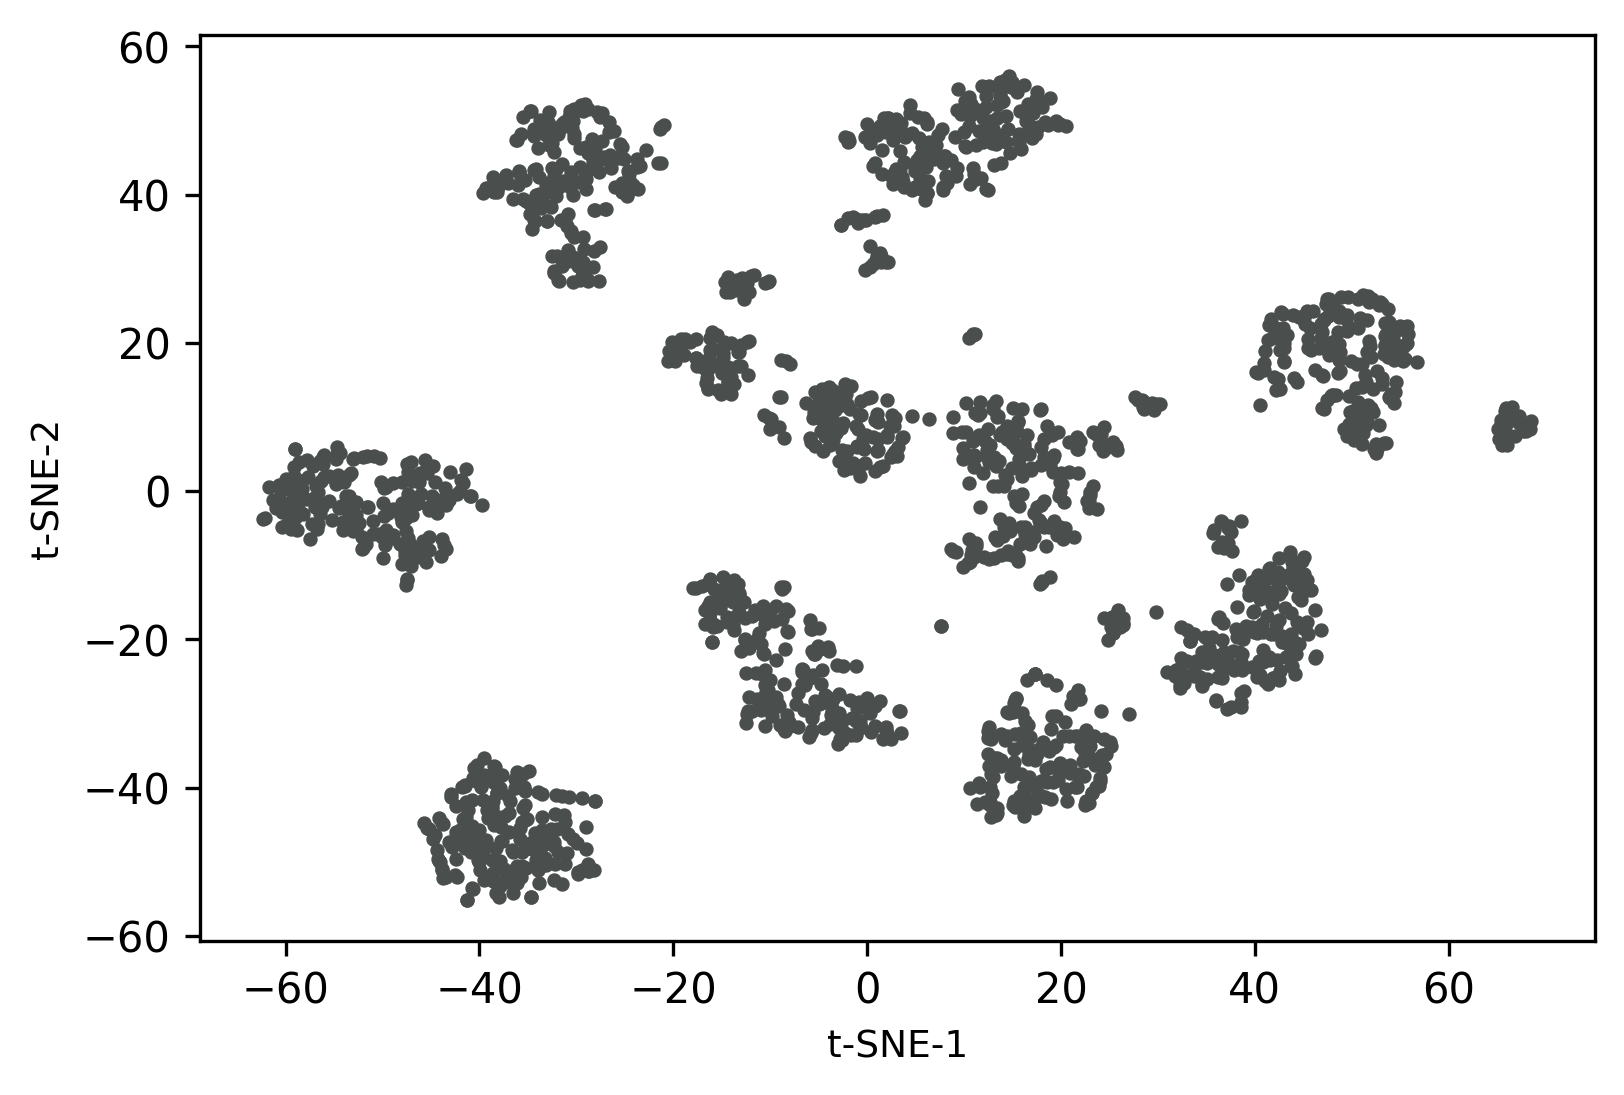

In [8]:
from IPython.display import Image
Image('tsne_2d.png')

In [9]:
# get a list of categories
color_class = df['class'].to_numpy()
cluster.tsneplot(score=tsne_em, colorlist=color_class, legendpos='upper right', legendanchor=(1.15, 1) )

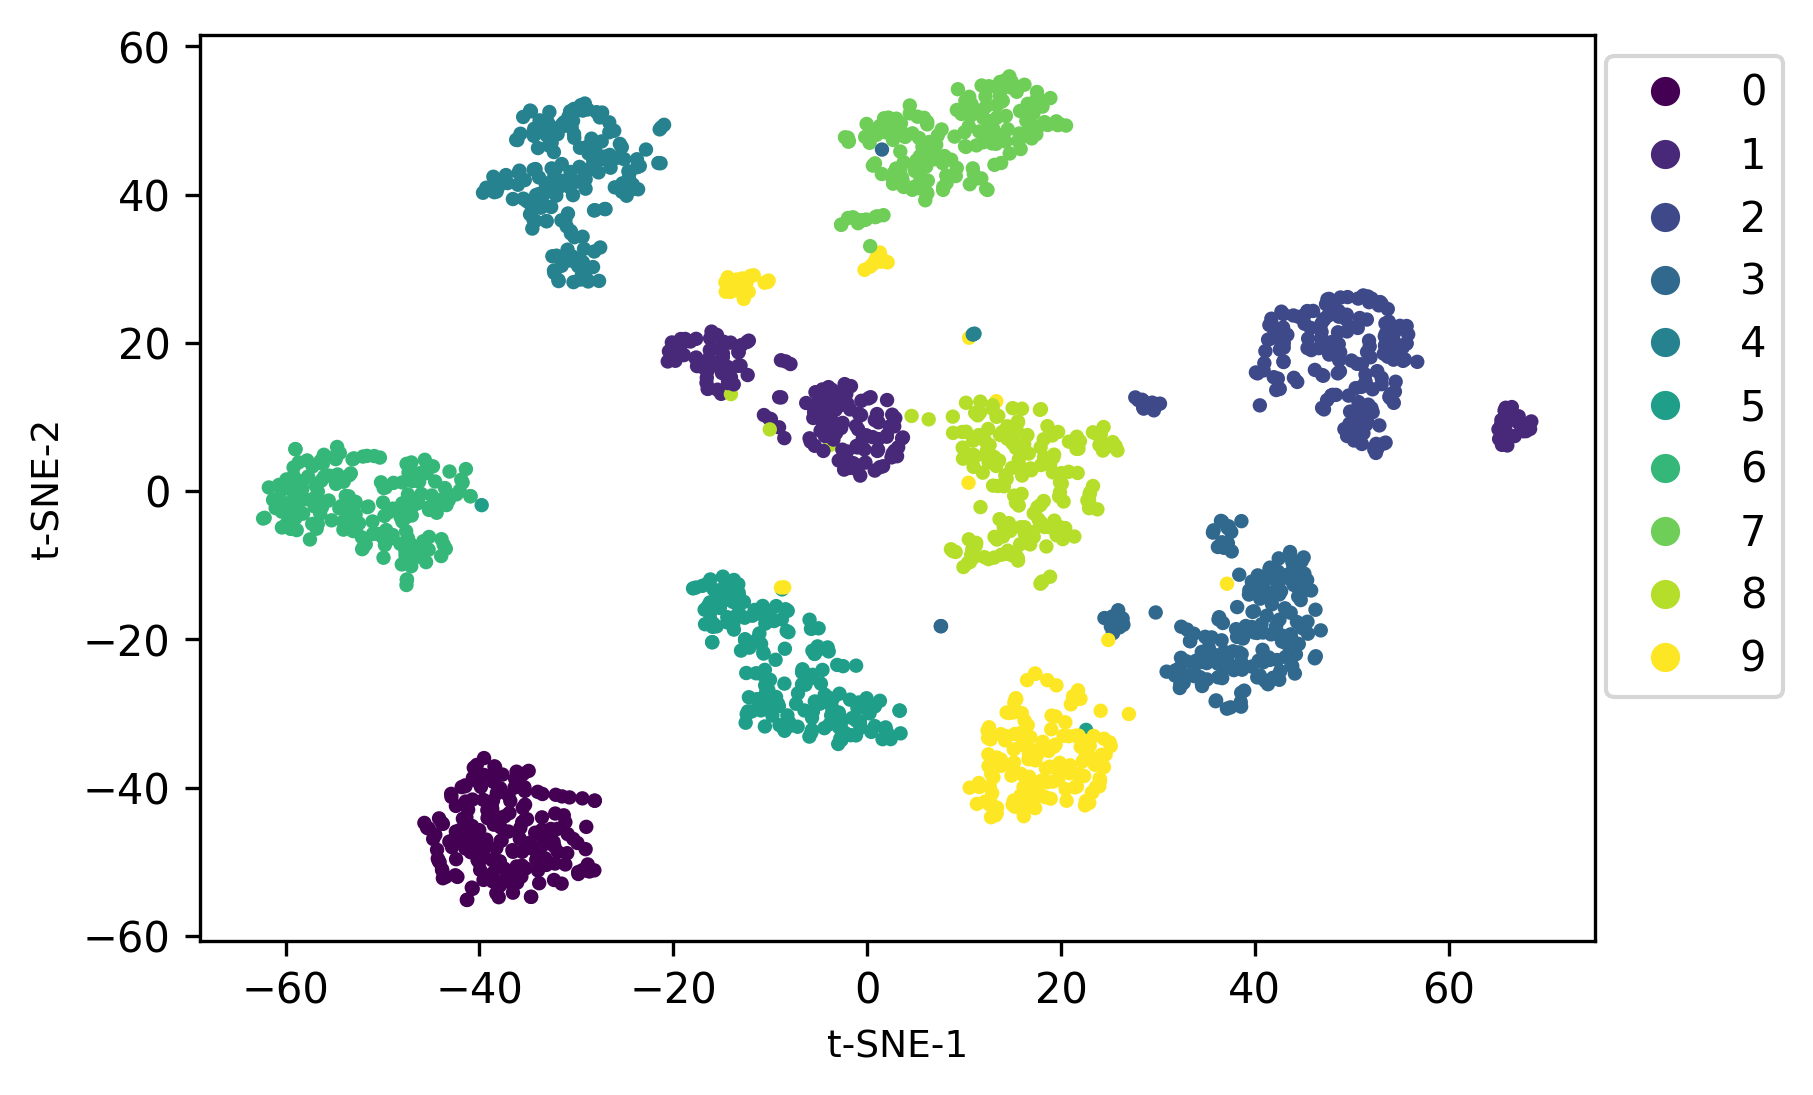

In [10]:
from IPython.display import Image
Image('tsne_2d.png')

In [11]:
# get a list of categories
color_class = df['class'].to_numpy()
cluster.tsneplot(score=tsne_em, colorlist=color_class, colordot=('#713e5a', '#63a375', '#edc79b', '#d57a66', '#ca6680', '#395B50', '#92AFD7', '#b0413e', '#4381c1', '#736ced'), 
    legendpos='upper right', legendanchor=(1.15, 1) )

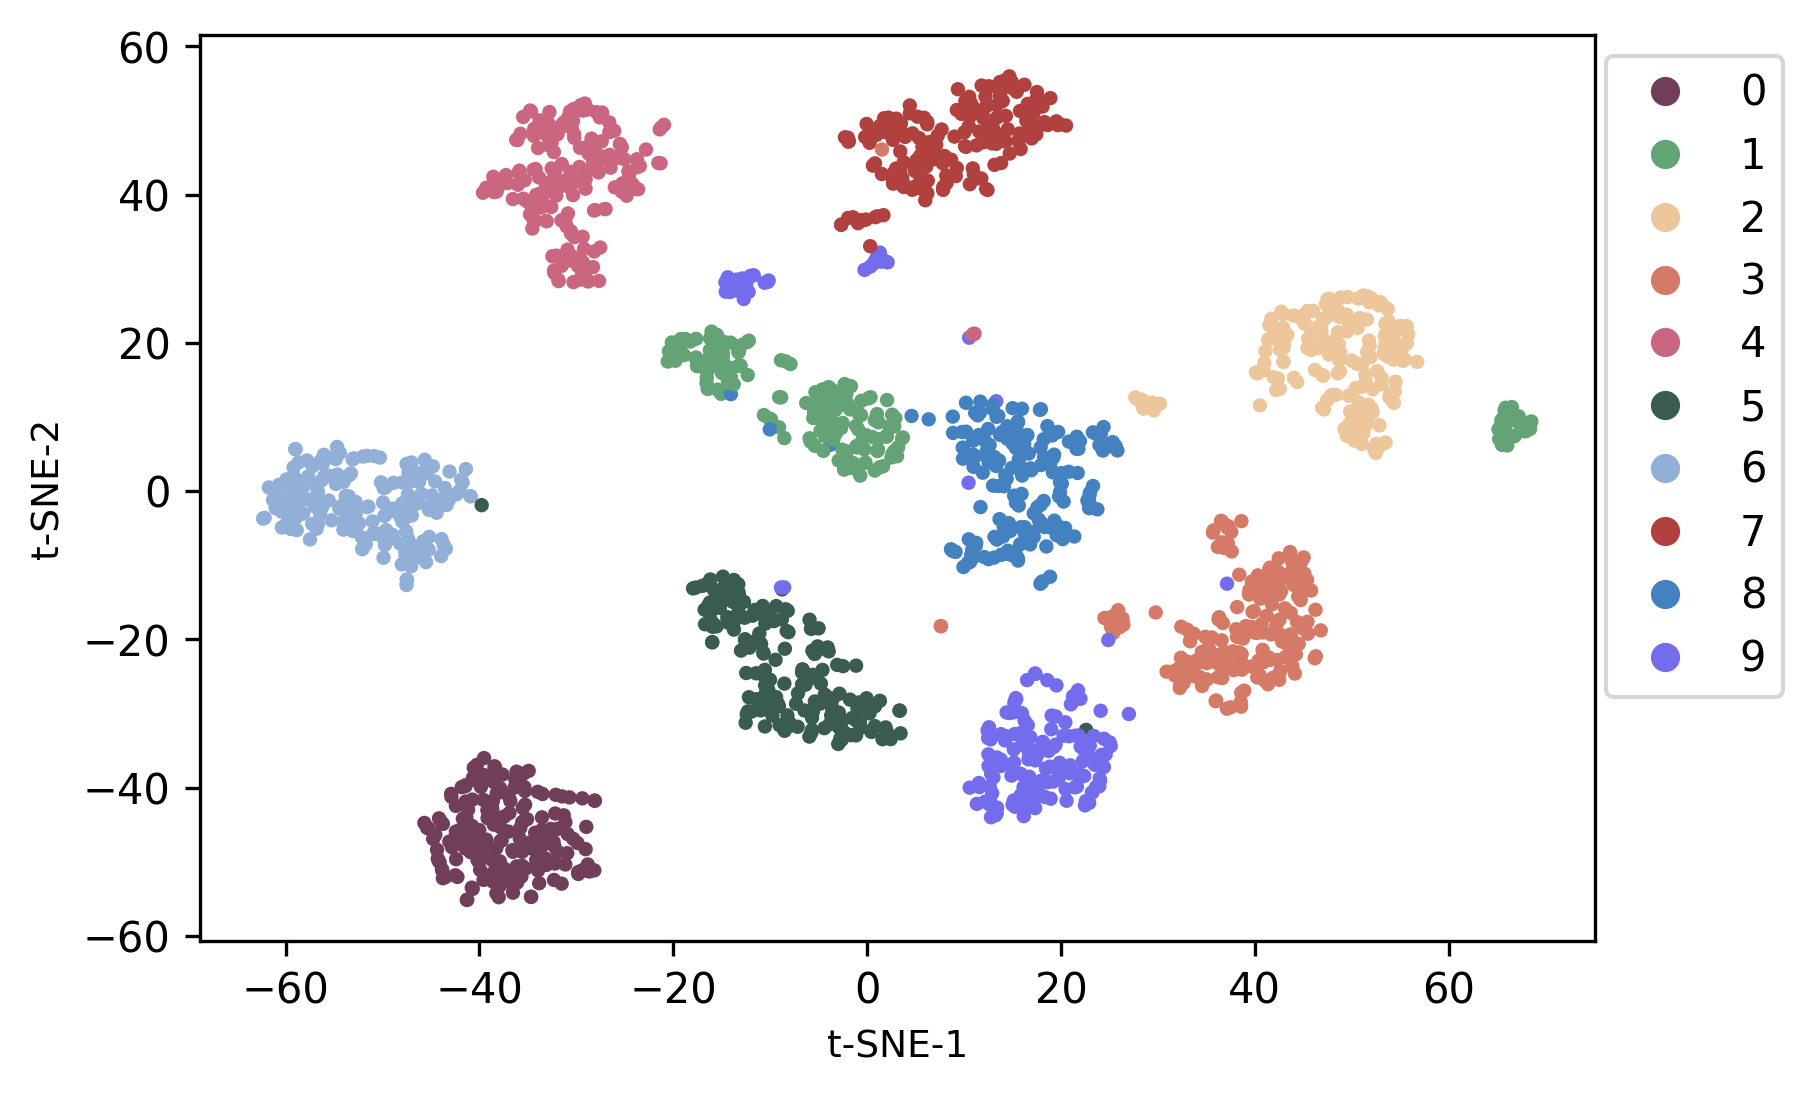

In [12]:
from IPython.display import Image
Image('tsne_2d.png')

# t-SNE with single cell RNA-seq (scRNA-seq) dataset

I have downloaded the subset of single cell gene expression dataset of Arabidopsis thaliana root cells processed by 10x genomics Cell Ranger pipeline (Ryu et al., 2019).

This scRNA-seq dataset contains 4406 cells with ~75K reads per cells

I have preprocessed this data (for expression cut-off, sequence depth normalization, log-transformation, and molecular feature selection) using Seurat R package and exported highly variable molecular features for t-SNE visualization.

In [14]:
# import scRNA-seq as pandas dataframe
from bioinfokit.analys import get_data
df = get_data('ath_root').data
df = df.set_index(df.columns[0])
dft = df.T
dft = dft.set_index(dft.columns[0])
dft.head(5)

gene,RPP1A,HTR12,AT1G01453,ADF10,PLIM2B,SBTI1.1,GL22,GPAT2,AT1G02570,BXL2,IMPA6,CSLD5,RPL19A,BGLU11,AT1G02870,RALF1,GSTF7,GSTF6,AT1G03010,AT1G03070,ATRRP4,BSU1,TPX2,SOM,AT1G03820,GRXS13,FLA9,AT1G03920,BARD1,AT1G04040,IAA3,RPS15A,AT1G04280,RPL23C,YUC3,PRMT10,ACO4,PER3,UGT75B1,UGT74E2,...,AT5G62440,HIPL2,ARR6,DOF5.6,BT1.1,FLS3,FLS5,SRK2H,PDF2.5,AAP4,PER69,RPS28C,ANAC104,BXL4,C/VIF2,AT5G64670,AT5G64680,AT5G64690,PEP3,TPPJ,HTR2.4,AT5G65380,AT5G65530,BHLH93,ATMYB68,ACS5,AT5G66230,NAC105,PER72,RAB18,AT5G66440,AT5G66580,AT5G66590,AT5G66800,AT5G66815,AT5G66860,AT5G66985,IRX14H,PER73,RPL26B
AT1G01070,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.51,1.40,-0.26,-0.28,-0.24,-0.14,-0.13,-0.07,-0.29,-0.31,-0.23,0.66,-0.07,1.36,-0.24,0.72,-0.52,-0.05,-0.21,-0.19,-0.34,3.00,-0.06,-0.06,-0.44,5.99,0.18,0.13,-0.17,-0.18,-0.97,-0.25,1.54,-0.49,1.21,-0.15,1.77,-0.29,-0.36,-0.39,-0.58,...,2.87,1.76,-0.03,-0.08,0.39,-0.26,-0.46,-0.55,-0.3,-0.12,-0.49,1.88,-0.14,-0.44,-0.36,0.16,-0.45,-0.33,0.25,1.43,-0.53,-0.52,-0.26,-0.66,-0.34,-0.16,-0.06,-0.21,-0.25,0.64,0.61,-0.55,-0.41,-0.43,2.01,3.01,-0.24,-0.18,-0.34,1.16
-0.22,1.36,-0.26,-0.28,-0.60,-0.51,-0.13,-0.07,-0.29,-0.31,0.81,-0.31,-0.07,1.20,-0.24,-0.49,-0.52,-0.05,-0.21,-0.19,-0.34,1.86,-0.06,-0.06,-0.44,-0.22,-0.41,0.33,1.29,-0.18,-1.12,-0.25,1.45,-0.49,1.16,-0.15,-0.39,-0.29,-0.38,-0.39,-0.08,...,0.81,2.09,-0.47,-0.08,1.77,0.92,-0.46,1.08,-0.3,-0.12,-0.69,0.79,-0.14,-0.44,-0.36,-0.59,0.93,-0.33,-0.34,1.47,0.47,-0.52,-0.26,-0.66,-0.34,-0.16,-0.06,-0.21,-0.25,1.25,-0.48,-0.55,-0.41,-0.43,-0.24,0.89,-0.24,-0.18,-0.49,-0.68
-0.22,2.49,-0.26,-0.28,-0.60,-0.51,-0.13,-0.07,-0.29,-0.31,-0.23,0.99,-0.07,1.97,-0.24,0.39,-0.52,-0.05,1.13,-0.19,-0.34,-0.27,-0.06,-0.06,-0.44,-0.22,-0.77,-0.04,-0.17,-0.18,-0.61,-0.25,2.42,-0.49,2.17,-0.15,0.72,-0.29,-0.18,-0.39,-0.19,...,1.38,-0.32,-0.47,-0.08,-0.62,-0.26,-0.46,-0.55,0.9,-0.12,-0.43,2.80,-0.14,-0.44,-0.36,1.93,0.64,-0.33,-0.34,-0.52,1.20,1.57,-0.26,0.80,0.37,-0.16,-0.06,-0.21,-0.25,-0.52,-0.48,-0.55,2.92,-0.43,-0.24,2.82,-0.24,-0.18,-0.49,1.60
2.24,0.82,-0.26,-0.28,-0.60,-0.51,-0.13,-0.07,-0.29,-0.31,-0.23,-0.31,-0.07,1.07,-0.24,-0.49,0.63,-0.05,-0.21,-0.19,-0.34,-0.27,-0.06,-0.06,-0.44,2.61,-0.06,-0.56,-0.17,-0.18,-0.83,-0.25,0.59,-0.49,1.75,-0.15,-0.39,-0.29,-0.57,-0.39,-0.03,...,2.05,-0.32,0.35,-0.08,0.77,-0.26,-0.46,-0.55,-0.3,-0.12,-0.04,0.08,-0.14,-0.44,0.82,1.91,-0.45,-0.33,0.79,0.23,0.80,-0.52,-0.26,-0.66,-0.34,-0.16,-0.06,-0.21,-0.25,-0.52,0.91,-0.55,-0.41,-0.43,-0.24,-0.43,-0.24,-0.18,-0.49,1.95
-0.22,-0.51,-0.26,-0.28,-0.60,-0.51,-0.13,-0.07,-0.29,-0.31,-0.23,-0.31,-0.07,0.36,-0.24,2.87,2.61,-0.05,-0.21,-0.19,-0.34,-0.27,-0.06,-0.06,-0.44,-0.22,0.92,-0.99,-0.17,-0.18,-0.18,-0.25,-1.10,-0.49,0.43,-0.15,-0.39,-0.29,0.02,-0.39,-0.58,...,-0.47,1.46,-0.47,-0.08,-0.62,-0.26,-0.46,-0.55,-0.3,-0.12,-0.69,0.60,-0.14,-0.44,-0.36,-0.59,3.73,-0.33,-0.34,-0.52,0.72,-0.52,-0.26,2.02,1.70,-0.16,-0.06,-0.21,3.51,-0.52,-0.48,1.85,-0.41,-0.43,-0.24,-0.43,8.85,-0.18,-0.49,0.16


In [15]:
dft.shape

(4406, 1999)

In [16]:
# as we have large number variables, we will first do to PCA to keep minimum number 
# of variables for t-SNE
from sklearn.decomposition import PCA
import pandas as pd
pca_scores = PCA().fit_transform(dft)
# create a dataframe of pca_scores
df_pc = pd.DataFrame(pca_scores)

In [17]:
df_pc.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
0,33.202097,-3.457645,10.100483,-5.602711,5.468774,4.765358,-1.399820,-1.822723,8.106291,-2.127576,-1.468916,-3.238135,-7.984020,-3.076352,-4.951533,0.426306,1.385455,-2.374678,1.315622,-4.121463,-2.794356,-2.285662,3.824220,-2.107015,-1.032314,-1.071515,-1.811167,-2.457909,-4.036082,-4.129968,0.046190,-0.939820,0.562859,-1.256859,2.785824,1.931222,0.106514,-0.702074,1.134719,3.336067,...,0.183095,-0.030908,-0.020921,-0.099146,0.154611,-0.024471,-0.103961,0.025769,-0.095417,0.020292,-0.062466,-0.048414,-0.015488,0.146515,0.113579,-0.009078,-0.125494,0.105285,0.058185,-0.006216,-0.032588,0.029769,-0.023506,0.013142,-0.167077,0.098526,-0.018977,0.018127,0.087032,-0.033099,-0.009621,-0.030077,0.155836,0.029736,0.018593,0.128040,-0.046346,0.026081,-0.044580,-0.017076
1,16.140405,-7.730882,8.817391,-4.562628,-0.948833,0.366297,0.353480,-7.046209,-0.891084,-4.770450,0.280619,-0.910278,-3.271121,-1.277289,-4.953450,-0.614598,5.854751,2.712810,3.018586,0.557024,-4.785082,-3.076939,-0.097616,4.109546,-2.183821,-1.110806,2.154730,-1.098911,-0.381155,-5.560972,3.677019,-2.502030,1.281047,0.172746,0.481099,-0.706531,-1.823595,3.734828,1.683744,-1.369786,...,-0.185002,0.154906,0.129466,-0.071360,-0.127864,-0.040853,-0.069312,0.160622,-0.155288,0.104273,0.098072,0.009653,-0.012494,-0.062095,0.045154,-0.130903,-0.065491,-0.158894,-0.010375,0.105856,0.043850,-0.132390,-0.081477,0.042276,0.129771,0.034802,0.018419,0.031005,-0.033843,-0.089249,-0.050917,-0.038599,0.084711,0.027323,0.094404,-0.055517,0.095456,0.013480,0.010027,-0.022456
2,45.305798,13.170182,-8.419124,2.587194,0.067264,3.110828,2.924562,0.469806,-0.655468,1.760740,-2.986211,2.397692,2.521857,-0.669563,1.495744,-3.479854,-6.463932,4.869332,-5.688530,1.930973,-0.053150,-2.369296,1.753402,0.202698,0.997980,-1.463574,2.380041,-0.280852,0.868377,2.447812,-1.080834,-1.946233,2.817339,0.588718,0.486115,-3.272865,-1.897383,-0.065156,-2.546993,-5.395685,...,-0.066793,-0.061398,-0.184261,-0.062382,-0.020033,0.000447,-0.000359,0.028379,-0.157709,0.116468,-0.001963,-0.075686,0.152947,-0.141202,0.023788,0.075074,0.001399,-0.062104,0.123444,0.122559,0.003210,-0.094258,0.029694,0.081942,-0.057087,-0.005027,0.067222,0.045920,0.058893,0.156093,-0.003250,0.027841,0.047337,-0.008074,-0.016089,0.000038,-0.099724,0.000813,-0.029671,0.012422
3,16.607894,-8.823090,10.410040,-10.578865,7.780630,-5.834628,0.809282,-8.411128,-1.307826,-8.999250,-0.750293,-3.217023,5.882702,0.936172,1.029101,-0.538972,2.151412,2.750326,3.073038,-2.868927,8.226430,2.971022,0.429328,-0.319323,-6.322478,-1.272074,2.535760,-0.738637,-0.262480,2.323905,-0.293243,1.973908,0.394686,-3.116284,-4.155355,0.831849,1.677775,-0.938544,-3.255187,2.711387,...,-0.103360,-0.136370,0.086760,-0.034779,-0.062984,0.005203,-0.079635,0.233001,0.071271,0.075939,0.062883,-0.136120,0.125029,-0.128484,-0.024103,-0.074576,0.070275,0.102850,-0.110205,0.003893,0.038730,0.192912,-0.033101,0.133529,0.071157,-0.048877,-0.066722,0.095808,-0.118796,-0.029455,-0.026696,-0.058972,-0.108107,-0.149698,0.026969,-0.072367,0.001116,-0.003842,0.018806,0.094809
4,-1.888054,-7.896728,0.984282,-8.480178,11.487023,3.027729,0.544338,-1.991663,-5.790069,8.938684,-7.693036,4.084316,2.263762,-0.437053,-5.525257,1.550675,1.996663,-0.255644,1.808535,-1.418952,3.933651,3.732129,0.887684,-1.242615,-2.230606,-2.250533,-0.478579,-2.710736,-0.733772,1.684897,-3.293785,-2.410399,-2.347521,1.821704,-0.518581,2.244096,-0.008074,2.627210,4.296783,-1.629261,...,-0.053793,-0.438035,0.310906,-0.056597,-0.137825,-0.043002,0.024118,0.242028,0.102521,-0.280113,0.127971,0.049540,0.219958,-0.033879,-0.176539,0.283129,-0.005387,-0.170339,-0.122753,-0.325538,0.097785,0.244789,0.16156

In [18]:
# perform t-SNE on PCs scores
# we will use first 50 PCs but this can vary
from sklearn.manifold import TSNE
tsne_em = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12, n_iter=1000, learning_rate=368, verbose=1).fit_transform(df_pc.loc[:,0:49])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4406 samples in 0.029s...
[t-SNE] Computed neighbors for 4406 samples in 1.209s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4406
[t-SNE] Computed conditional probabilities for sample 2000 / 4406
[t-SNE] Computed conditional probabilities for sample 3000 / 4406
[t-SNE] Computed conditional probabilities for sample 4000 / 4406
[t-SNE] Computed conditional probabilities for sample 4406 / 4406
[t-SNE] Mean sigma: 4.812347
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.120850
[t-SNE] KL divergence after 1000 iterations: 0.839862


In [19]:
# plot t-SNE clusters
from bioinfokit.visuz import cluster
cluster.tsneplot(score=tsne_em)

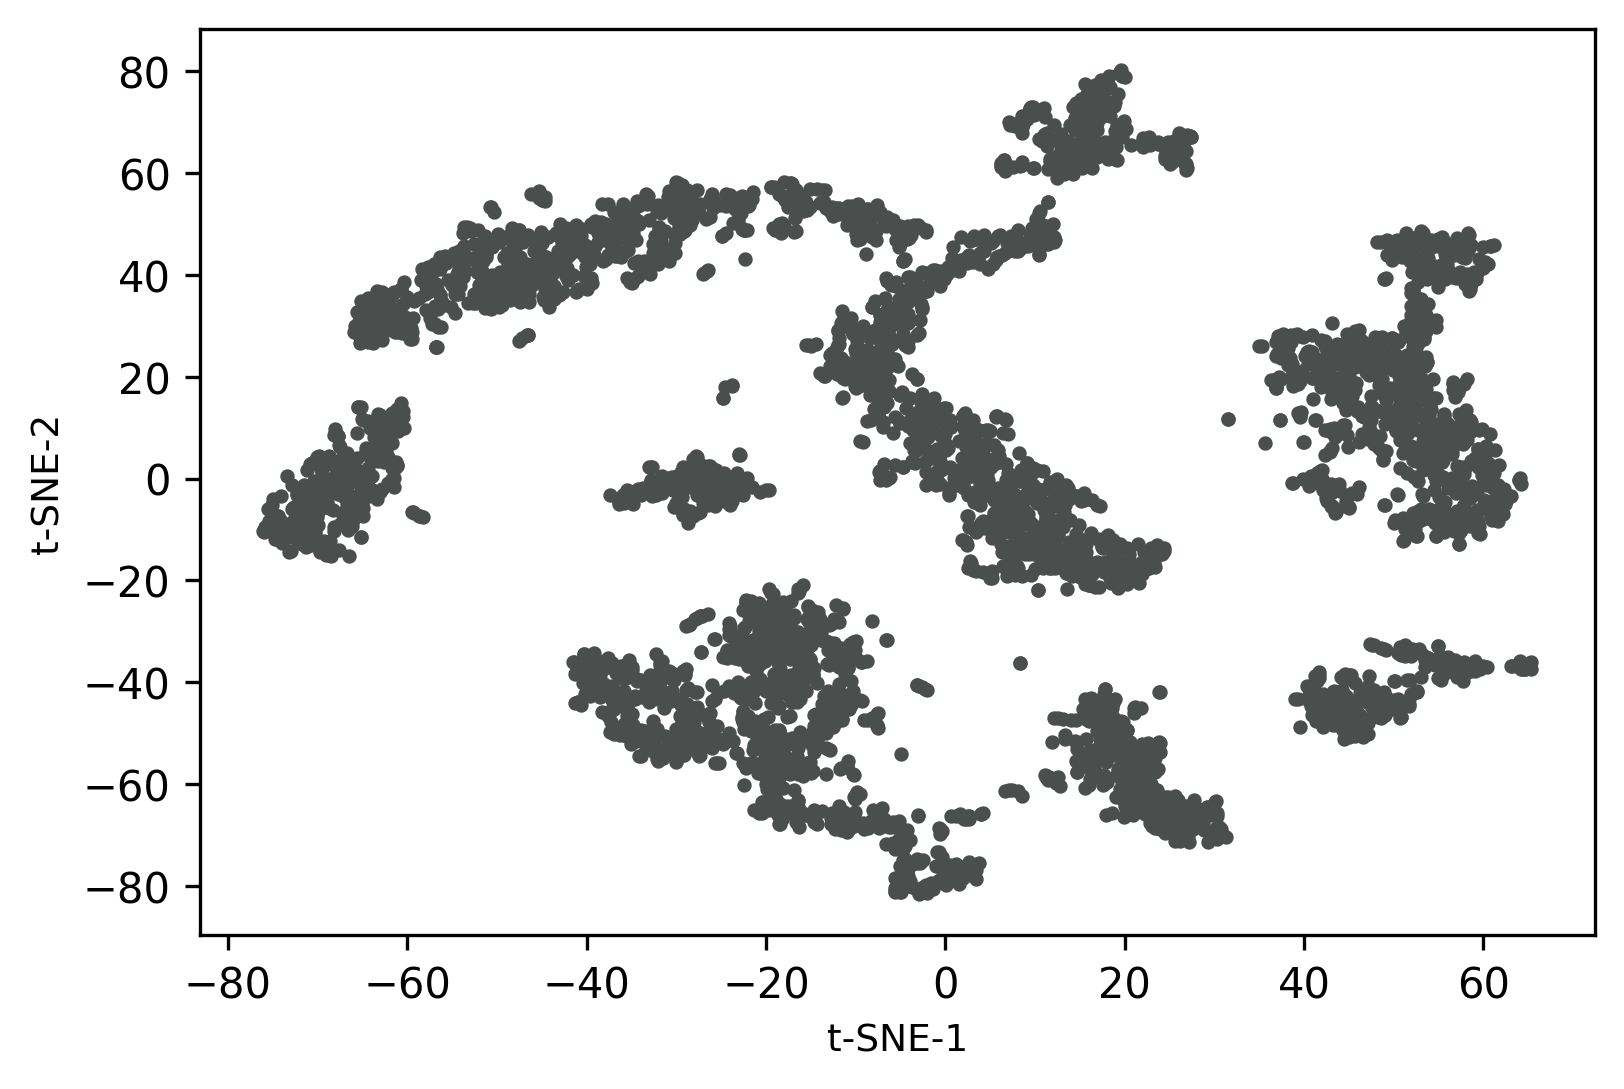

In [20]:
from IPython.display import Image
Image('tsne_2d.png')

Now, I will recognize the clusters using the DBSCAN algorithm. This will help to color and visualize clusters of similar data points.

In [21]:
from sklearn.cluster import DBSCAN
# here eps parameter is very important and optimizing eps is essential
# for well defined clusters. I have run DBSCAN with several eps values
# and got good clusters with eps=3
get_clusters = DBSCAN(eps=3, min_samples=10).fit_predict(tsne_em)
# check unique clusters
# -1 value represents noisy points could not assigned to any cluster
set(get_clusters)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [23]:
# get t-SNE plot with colors assigned to each cluster
cluster.tsneplot(score=tsne_em, colorlist=get_clusters, 
    colordot=('#713e5a', '#63a375', '#edc79b', '#d57a66', '#ca6680', '#395B50', '#92AFD7', '#b0413e', '#4381c1', '#736ced', '#631a86', '#de541e', '#022b3a', '#000000'), 
    legendpos='upper right', legendanchor=(1.15, 1))

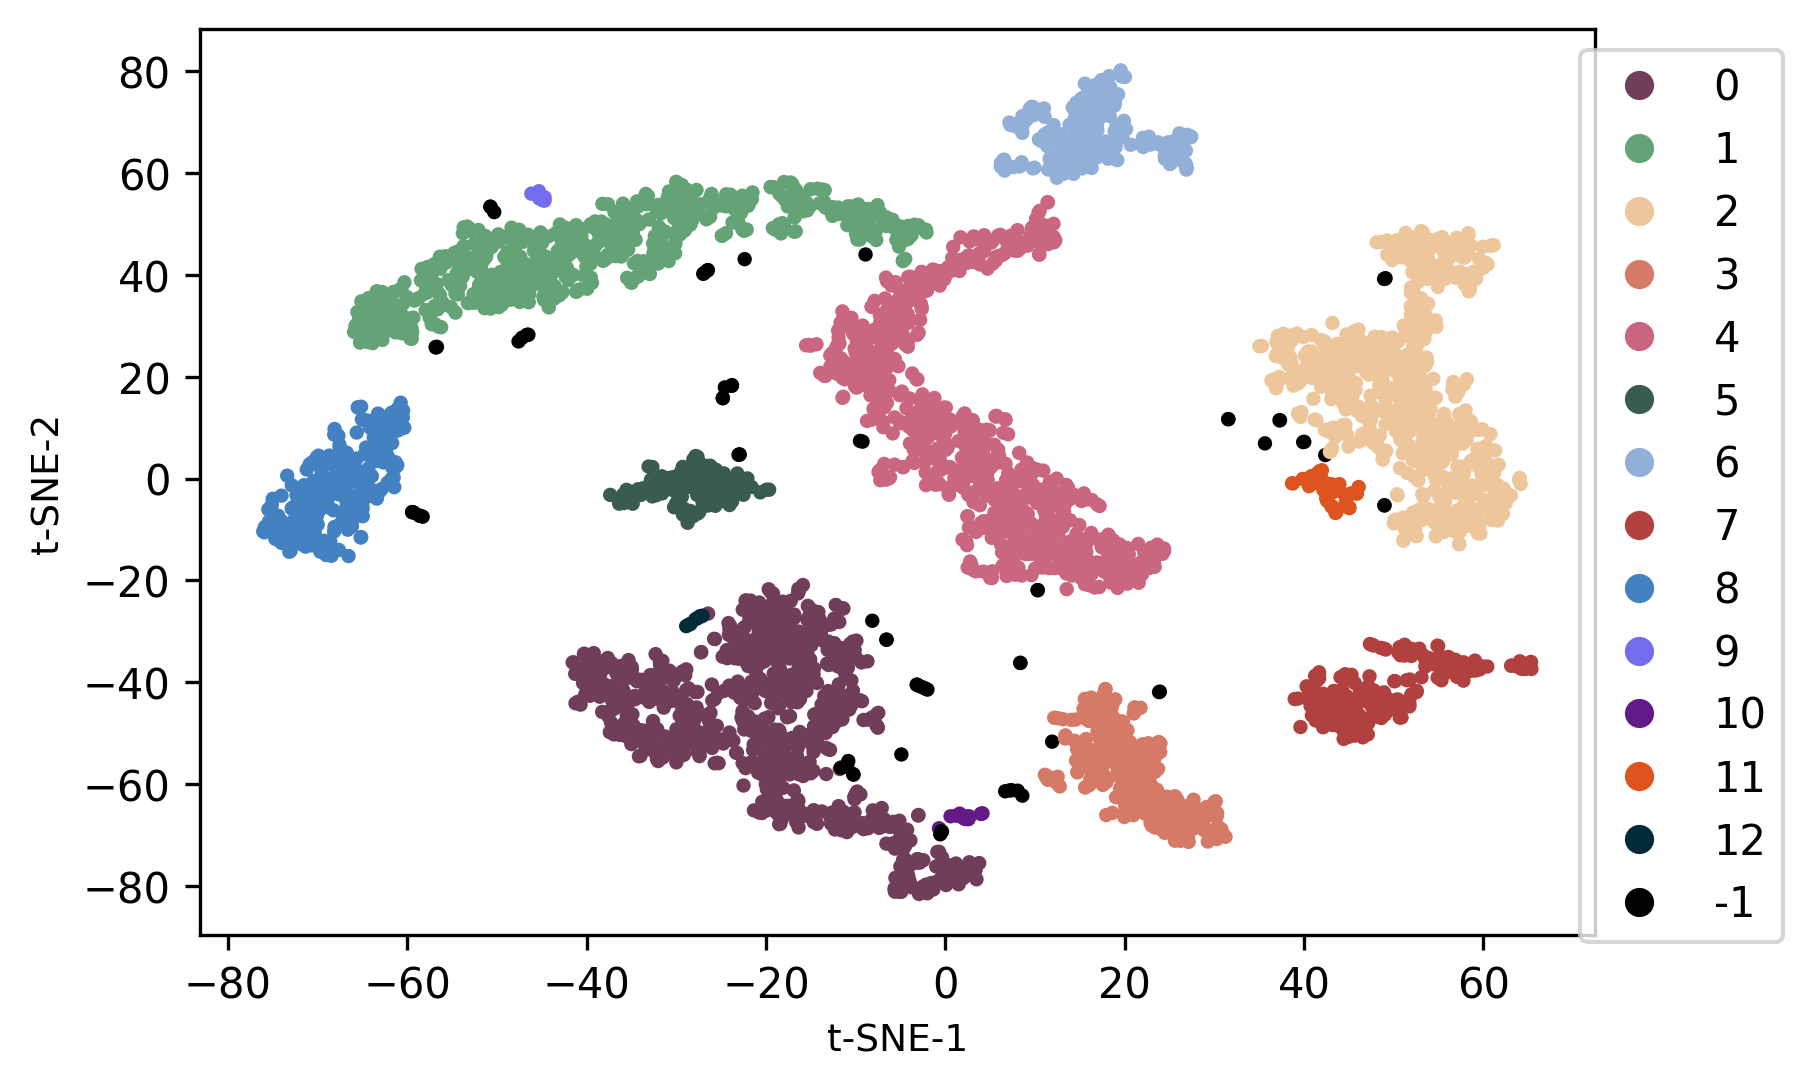

In [24]:
from IPython.display import Image
Image('tsne_2d.png')

The points within the individual clusters are highly similar to each other and in distant to points in other clusters. The same pattern likely holds in a high-dimensional original dataset. In the digits dataset, t-SNE separated clusters of each digit class. In the context of scRNA-seq, these clusters represent the cells types with similar transcriptional profiles.

For more details please refer: [tSNE](https://www.reneshbedre.com/blog/tsne.html)